# CSCE 623 Homework Assignment 2
## Student Name: Marvin Newlin
## Date: 23 Apr 19



In [117]:
"""
HW2
"""

import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model, metrics

# Imports from Chapter 4 Lab
import matplotlib as mpl
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

# Step 1

##### Read in CSV files to dataframes

In [118]:
# Read CSV files into dataframes
data1_csv = 'dataset1.csv'
data2_csv = 'dataset2.csv'
data3_csv = 'dataset3.csv'

#Header line in CSV files don't give us any useful info so I
# skip the header row and add column names that are more useful
data1 = pd.read_csv(data1_csv, skiprows=1, names=['index','cat1', 'cat2', 'class'])
data2 = pd.read_csv(data2_csv, skiprows=1, names=['index','cat1', 'cat2', 'class'])
data3 = pd.read_csv(data3_csv, skiprows=1, names=['index','cat1', 'cat2', 'class'])


# Step 2

#### Display datasets and statistics

In [119]:
display(md("First 5 entries of dataset 1"))
display(data1.head())
display(md("Dataset 1 statistics"))
display(data1.describe())
display(md("First 5 entries of dataset 2"))
display(data2.head())
display(md("Dataset 2 statistics"))
display(data2.describe())
display(md("First 5 entries of dataset 3"))
display(data3.head())
display(md("Dataset 3 statistics"))
display(data3.describe())

First 5 entries of dataset 1

,index,cat1,cat2,class
0,0,0.548814,0.715189,0.0
1,1,0.602763,0.544883,0.0
2,2,0.423655,0.645894,0.0
3,3,0.437587,0.891773,0.0
4,4,0.963663,0.383442,0.0


Dataset 1 statistics

,index,cat1,cat2,class
count,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.747401,0.494678,0.500000
std,173.349358,0.380747,0.296411,0.500417
min,0.000000,0.002703,0.000546,0.000000
25%,149.750000,0.510941,0.244774,0.000000
50%,299.500000,0.730347,0.466113,0.500000
75%,449.250000,0.984056,0.754525,1.000000
max,599.000000,1.499809,0.999278,1.000000


First 5 entries of dataset 2

,index,cat1,cat2,class
0,0,0.332130,-0.313696,0.0
1,1,1.859941,0.290296,0.0
2,2,-0.811141,-0.654312,0.0
3,3,-0.125626,-0.253332,0.0
4,4,0.340797,0.118178,0.0


Dataset 2 statistics

,index,cat1,cat2,class
count,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.473725,0.495420,0.500000
std,173.349358,0.951497,0.576779,0.500417
min,0.000000,-2.528299,-0.856548,0.000000
25%,149.750000,-0.152288,0.018048,0.000000
50%,299.500000,0.460075,0.515972,0.500000
75%,449.250000,1.121963,0.973737,1.000000
max,599.000000,3.290265,1.786571,1.000000


First 5 entries of dataset 3

,index,cat1,cat2,class
0,0,2.000786,-2.967885,0.0
1,1,11.204466,1.179775,0.0
2,2,-4.886389,-5.103305,0.0
3,3,-0.756786,-2.112077,0.0
4,4,2.052993,0.781276,0.0


Dataset 3 statistics

,index,cat1,cat2,class
count,600.000000,600.000000,600.000000,600.000000
mean,299.500000,0.477786,2.196081,0.500000
std,173.349358,3.822859,4.382142,0.500417
min,0.000000,-15.230715,-10.529514,0.000000
25%,149.750000,-1.234267,-0.722251,0.000000
50%,299.500000,0.802649,1.376222,0.500000
75%,449.250000,2.632443,4.799941,1.000000
max,599.000000,12.062268,20.120173,1.000000


Text(0.5, 1.0, 'Scatterplot of Dataset 3')

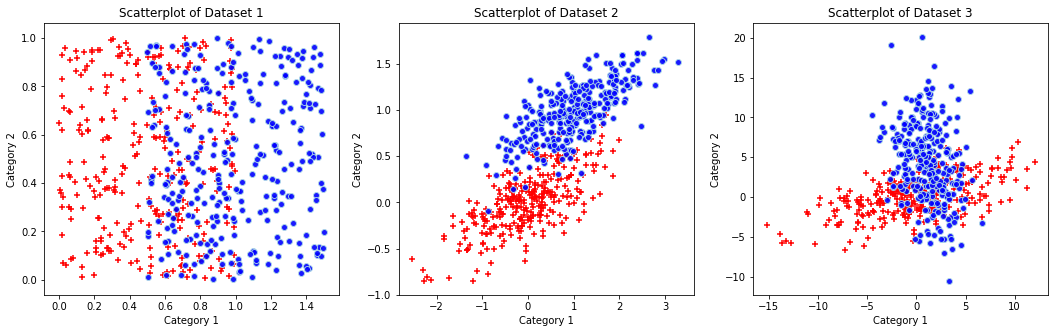

In [120]:
# Code for plotting scatter plot of data. Code modified from ISLR Chapter 4 lab code on github
fig1 = plt.figure(figsize=(18,5))
gs = mpl.gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0,0])
ax1.scatter(data1[data1['class']==0].cat1, data1[data1['class']==0].cat2, c='red', marker='+', linewidths=1)
ax1.scatter(data1[data1['class']==1].cat1, data1[data1['class']==1].cat2, c='blue', marker='o', linewidths=1,
           edgecolors='lightblue', facecolors='white', alpha=.9)
ax1.set_ylabel('Category 2')
ax1.set_xlabel('Category 1')
ax1.set_title('Scatterplot of Dataset 1')
#Plot dataset 2
ax2 = plt.subplot(gs[0,1])
ax2.scatter(data2[data2['class']==0].cat1, data2[data2['class']==0].cat2, c='red', marker='+', linewidths=1)
ax2.scatter(data2[data2['class']==1].cat1, data2[data2['class']==1].cat2, c='blue', marker='o', linewidths=1,
           edgecolors='lightblue', facecolors='white', alpha=.9)
ax2.set_ylabel('Category 2')
ax2.set_xlabel('Category 1')
ax2.set_title('Scatterplot of Dataset 2')
#Plot dataset 3
ax3 = plt.subplot(gs[0,2])
ax3.scatter(data3[data3['class']==0].cat1, data3[data3['class']==0].cat2, c='red', marker='+', linewidths=1)
ax3.scatter(data3[data3['class']==1].cat1, data3[data3['class']==1].cat2, c='blue', marker='o', linewidths=1,
           edgecolors='lightblue', facecolors='white', alpha=.9)
ax3.set_ylabel('Category 2')
ax3.set_xlabel('Category 1')
ax3.set_title('Scatterplot of Dataset 3')

# Step 3

#### Discussion of Datasets

# Step 4

#### Split datasets into test and training

In [121]:
#The code for this function is based on the in class logistic1d function code
"""
This function splits the provided dataframe into test and training sets based on the provided
split fraction (a float between 0 and 1)
"""
def split_test_train(df, fraction):
    length = len(df['index'])
    df_train0 = df[df['index'] < (length/4)] # first half of 0 class (first 1/4th of the dataset) 
    df_train1 = df[(df['index'] >= (length/2)) & (df['index'] < (3*length/4))] # first half of 1 class (3rd quarter)
    df_test0 = df[(df['index'] >= (length/4)) & (df['index'] < (length/2))] # second half of 0 class (2nd quarter)
    df_test1 = df[df['index'] >= (3*length/4)] # second half of 1 class (last quarter)
    train_frames = [df_train0, df_train1]
    df_train = pd.concat(train_frames)
    test_frames = [df_test0, df_test1]
    df_test = pd.concat(test_frames)
    return (df_test, df_train)


### Dataset 1

In [122]:
#Split dataset 1 into test and train
test_train1 = split_test_train(data1, 0.5)
data1_test = test_train1[0]
data1_train = test_train1[1]

display(data1_test.describe())
display(data1_test.head())
display(data1_train.describe())
display(data1_train.head())


,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,374.500000,0.736856,0.501839,0.500000
std,156.385543,0.383782,0.303126,0.500835
min,150.000000,0.002703,0.010064,0.000000
25%,224.750000,0.501715,0.255383,0.000000
50%,374.500000,0.725004,0.457067,0.500000
75%,524.250000,0.984056,0.784684,1.000000
max,599.000000,1.499809,0.997994,1.000000


,index,cat1,cat2,class
150,150,0.906555,0.774047,0.0
151,151,0.333145,0.081101,0.0
152,152,0.407241,0.232234,0.0
153,153,0.132488,0.053427,0.0
154,154,0.725594,0.011427,0.0


,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,224.500000,0.757946,0.487518,0.500000
std,156.385543,0.378033,0.289869,0.500835
min,0.000000,0.011714,0.000546,0.000000
25%,74.750000,0.522898,0.238283,0.000000
50%,224.500000,0.740554,0.478877,0.500000
75%,374.250000,0.983291,0.731078,1.000000
max,449.000000,1.491890,0.999278,1.000000


,index,cat1,cat2,class
0,0,0.548814,0.715189,0.0
1,1,0.602763,0.544883,0.0
2,2,0.423655,0.645894,0.0
3,3,0.437587,0.891773,0.0
4,4,0.963663,0.383442,0.0


### Dataset 2
    

In [123]:
#Split dataset 2 into test and train
test_train2 = split_test_train(data2, 0.5)
data2_test = test_train2[0]
data2_train = test_train2[1]

display(data2_test.describe())
display(data2_test.head())
display(data2_train.describe())
display(data2_train.head())

,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,374.500000,0.462264,0.483399,0.500000
std,156.385543,0.983031,0.573959,0.500835
min,150.000000,-2.528299,-0.847026,0.000000
25%,224.750000,-0.187462,-0.004776,0.000000
50%,374.500000,0.434963,0.508892,0.500000
75%,524.250000,1.150620,0.967250,1.000000
max,599.000000,3.290265,1.618334,1.000000


,index,cat1,cat2,class
150,150,1.376248,0.681871,0.0
151,151,-0.564548,-0.129263,0.0
152,152,-0.382397,-0.259234,0.0
153,153,-1.117776,-0.002866,0.0
154,154,-0.132446,-0.196270,0.0


,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,224.500000,0.485185,0.507442,0.500000
std,156.385543,0.920384,0.580295,0.500835
min,0.000000,-2.301252,-0.856548,0.000000
25%,74.750000,-0.124554,0.046961,0.000000
50%,224.500000,0.505978,0.521982,0.500000
75%,374.250000,1.081577,0.984248,1.000000
max,449.000000,2.976019,1.786571,1.000000


,index,cat1,cat2,class
0,0,0.332130,-0.313696,0.0
1,1,1.859941,0.290296,0.0
2,2,-0.811141,-0.654312,0.0
3,3,-0.125626,-0.253332,0.0
4,4,0.340797,0.118178,0.0


### Dataset 3

In [124]:
#Split dataset 3 into test and train
test_train3 = split_test_train(data3, 0.5)
data3_test = test_train3[0]
data3_train = test_train3[1]

display(data3_test.describe())
display(data3_test.head())
display(data3_train.describe())
display(data3_train.head())

,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,374.500000,0.116346,2.557350,0.500000
std,156.385543,3.822758,4.528323,0.500835
min,150.000000,-15.230715,-5.739253,0.000000
25%,224.750000,-1.554478,-0.641305,0.000000
50%,374.500000,0.520179,1.619968,0.500000
75%,524.250000,2.200002,5.421993,1.000000
max,599.000000,12.062268,20.120173,1.000000


,index,cat1,cat2,class
150,150,8.290653,4.934437,0.0
151,151,-3.400891,-0.715921,0.0
152,152,-2.303599,-1.977774,0.0
153,153,-6.733588,0.783112,0.0
154,154,-0.797867,-1.610949,0.0


,index,cat1,cat2,class
count,300.000000,300.000000,300.000000,300.000000
mean,224.500000,0.839226,1.834812,0.500000
std,156.385543,3.794963,4.207488,0.500835
min,0.000000,-13.862964,-10.529514,0.000000
25%,74.750000,-1.035905,-0.791177,0.000000
50%,224.500000,1.091485,1.167955,0.500000
75%,374.250000,3.002688,4.006558,1.000000
max,449.000000,11.204466,16.406478,1.000000


,index,cat1,cat2,class
0,0,2.000786,-2.967885,0.0
1,1,11.204466,1.179775,0.0
2,2,-4.886389,-5.103305,0.0
3,3,-0.756786,-2.112077,0.0
4,4,2.052993,0.781276,0.0


# Step 5

### Create Design matrices and response vectors for each dataset

In [125]:
# Logistic Regression Model

# Feature vectors for dataset 1
x1 = data1_train['cat1']
x2 = data1_train['cat2']
y1 =  data1_train['class'] # y vector from training dataset 1
# Create nx2 matrix of feature vectors from training dataset 1
X1 = np.vstack((x1, x2)).T
print('Dimensions of X1: ' + str(X1.shape))

# Feature vectors for training dataset 2
x1 = data2_train['cat1']
x2 = data2_train['cat2']
y2 =  data2_train['class'] # y vector from training dataset 2
# Create nx2 matrix of feature vectors from training dataset 2
X2 = np.vstack(( x1, x2)).T
print('Dimensions of X2: ' + str(X2.shape))


# Feature vectors for training dataset 3
x1 = data3_train['cat1']
x2 = data3_train['cat2']
y3 =  data3_train['class'] # y vector from training dataset 3
# Create nx2 matrix of feature vectors from training dataset 3
X3 = np.vstack(( x1, x2)).T
print('Dimensions of X3: ' + str(X3.shape))



Dimensions of X1: (300, 2)
Dimensions of X2: (300, 2)
Dimensions of X3: (300, 2)


### Train Models
#### Logistic Regression

In [126]:
log_reg1 = skl_lm.LogisticRegression(solver='liblinear')
log_reg2 = skl_lm.LogisticRegression(solver='liblinear')
log_reg3 = skl_lm.LogisticRegression(solver='liblinear')

log_reg1.fit(X1, y1)
log_reg2.fit(X2, y2)
log_reg3.fit(X3, y3)

#Print Dataset 1 coefficients
display(md("##### Dataset 1 beta values"))
display(md(r" $\beta_0$: %f" %log_reg1.intercept_))
display(md(r" $\beta_1$: %f" %log_reg1.coef_[0,0]))
display(md(r" $\beta_2$: %f" %log_reg1.coef_[0,1]))

#Print Dataset 2 coefficients
display(md("##### Dataset 2 beta values"))
display(md(r" $\beta_0$: %f" %log_reg2.intercept_))
display(md(r" $\beta_1$: %f" %log_reg2.coef_[0,0]))
display(md(r" $\beta_2$: %f" %log_reg2.coef_[0,1]))

#Print Dataset 3 coefficients
display(md("##### Dataset 3 beta values"))
display(md(r" $\beta_0$: %f" %log_reg3.intercept_))
display(md(r" $\beta_1$: %f" %log_reg3.coef_[0,0]))
display(md(r" $\beta_2$: %f" %log_reg3.coef_[0,1]))

##### Dataset 1 beta values

 $\beta_0$: -2.748916

 $\beta_1$: 4.003120

 $\beta_2$: -0.486907

##### Dataset 2 beta values

 $\beta_0$: -2.488031

 $\beta_1$: -0.847467

 $\beta_2$: 5.797421

##### Dataset 3 beta values

 $\beta_0$: -0.392890

 $\beta_1$: 0.015495

 $\beta_2$: 0.223014

#### Linear Discriminant Analysis

In [127]:
lda1 = LinearDiscriminantAnalysis(solver='lsqr') # Use slqr to get covariance matrix
lda2 = LinearDiscriminantAnalysis(solver='lsqr')
lda3 = LinearDiscriminantAnalysis(solver='lsqr')

lda1.fit(X1, y1)
lda2.fit(X2, y2)
lda3.fit(X3, y3)

#Print Dataset 1 coefficients
display(md("##### Dataset 1 beta values"))
display(md(r" $\beta_0$: %f" %lda1.intercept_))
display(md(r" $\beta_1$: %f" %lda1.coef_[0,0]))
display(md(r" $\beta_2$: %f" %lda1.coef_[0,1]))

#Print Dataset 2 coefficients
display(md("##### Dataset 2 beta values"))
display(md(r" $\beta_0$: %f" %lda2.intercept_))
display(md(r" $\beta_1$: %f" %lda2.coef_[0,0]))
display(md(r" $\beta_2$: %f" %lda2.coef_[0,1]))

#Print Dataset 3 coefficients
display(md("##### Dataset 3 beta values"))
display(md(r" $\beta_0$: %f" %lda3.intercept_))
display(md(r" $\beta_1$: %f" %lda3.coef_[0,0]))
display(md(r" $\beta_2$: %f" %lda3.coef_[0,1]))

##### Dataset 1 beta values

 $\beta_0$: -4.484797

 $\beta_1$: 6.125359

 $\beta_2$: -0.323873

##### Dataset 2 beta values

 $\beta_0$: -5.957747

 $\beta_1$: -2.943577

 $\beta_2$: 14.555226

##### Dataset 3 beta values

 $\beta_0$: -0.416956

 $\beta_1$: 0.020448

 $\beta_2$: 0.217895

#### Quadratic Discriminant Analysis 

In [128]:
qda1 = QuadraticDiscriminantAnalysis()
qda2 = QuadraticDiscriminantAnalysis()
qda3 = QuadraticDiscriminantAnalysis()

qda1.fit(X1, y1)
qda2.fit(X2, y2)
qda3.fit(X3, y3)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

# Step 6

### Predicted probabilities

#### Create Test Matrices

In [129]:
# Create Test Matrices

# Feature vectors for dataset 1
x1_test = data1_test['cat1']
x2_test = data1_test['cat2']
y1_test =  data1_test['class'] # y vector from training dataset 1
# Create nx2 matrix of feature vectors from training dataset 1
X1_test = np.vstack((x1_test, x2_test)).T
print('Dimensions of X1 Test: ' + str(X1_test.shape))

# Feature vectors for training dataset 2
x1_test = data2_test['cat1']
x2_test = data2_test['cat2']
y2_test =  data2_test['class'] # y vector from training dataset 2
# Create nx2 matrix of feature vectors from training dataset 2
X2_test = np.vstack(( x1_test, x2_test)).T
print('Dimensions of X2 Test: ' + str(X2_test.shape))


# Feature vectors for training dataset 3
x1_test = data3_test['cat1']
x2_test = data3_test['cat2']
y3_test =  data3_test['class'] # y vector from training dataset 3
# Create nx2 matrix of feature vectors from training dataset 3
X3_test = np.vstack(( x1_test, x2_test)).T
print('Dimensions of X3 Test: ' + str(X3_test.shape))

Dimensions of X1 Test: (300, 2)
Dimensions of X2 Test: (300, 2)
Dimensions of X3 Test: (300, 2)


To find the predicted probabilities, I use the built in predic_proba(X) function from sklearn. This function takes in the feature matrix and returns a vector where each entry is a tuple of the sample value and the predicted probability that it belongs to the positive class (class 1). 

#### Logistic Regression

In [130]:
dataset1_prob_lr = log_reg1.predict_proba(X1_test)
dataset2_prob_lr = log_reg2.predict_proba(X2_test)
dataset3_prob_lr = log_reg3.predict_proba(X3_test)


#### Linear Discriminant Analysis

In [131]:
dataset1_prob_lda = lda1.predict_proba(X1_test)
dataset2_prob_lda = lda2.predict_proba(X2_test)
dataset3_prob_lda = lda3.predict_proba(X3_test)


#### Quadratic Discriminant Analysis

In [132]:
dataset1_prob_qda = qda1.predict_proba(X1_test)
dataset2_prob_qda = qda2.predict_proba(X2_test)
dataset3_prob_qda = qda3.predict_proba(X3_test)



# Step 7

#### getROCdata function

In [133]:
"""
    This function creates a dataframe that contains all of the necessary data for calculating the ROC curve
    Parameters:
        truthVals: A vector containing the correct labels for each sample
        probs: A vector containing the sample and the probability of the sample belonging to class 1
        thresholds: A list of probability thresholds
"""
def getROCdata(truthVals,probs,thresholds):
    num_samples = len(thresholds)
    roc_data_columns = ['prob_threshold', 'TP_count', 'FP_count', 'TN_count', 'FN_count', 'TP_rate',
                       'FP_rate', 'accuracy', 'precision', 'F-measure']
    roc_data_df = pd.DataFrame(np.zeros((num_samples, len(roc_data_columns)), dtype=float),
                               columns = roc_data_columns)
    
    # calculate values
    curr_entry = []  
    position = 0
    for curr_prob in thresholds:
        # Variables
        tp_count = 0
        fp_count = 0
        tn_count = 0
        fn_count = 0
        tp_rate = 0.
        fp_rate = 0.
        accuracy = 0.
        precision = 0.
        f_measure = 0.
        predict_prob = 0.0
        #end variable declarations
        counter = 0
        for val in truthVals:
            predict_prob = probs[counter]
            if (val == 0):
                if(predict_prob >= curr_prob):
                    fp_count += 1 #Truth val neg, predict pos: false positive
                else:
                    tn_count += 1 #Truth val neg, predict neg: true negative 
            else:
                if(predict_prob >= curr_prob):
                    tp_count += 1 # truth val positive, predict pos: true positive
                else:
                    fn_count += 1 # truth val positive, predict neg: false negative
            counter += 1
         #End for
        tp_rate = tp_count/(tp_count + fn_count)
        fp_rate = fp_count/(tn_count + fp_count)
        accuracy = (tn_count + tp_count)/(tp_count + tn_count + fp_count + fn_count)
        precision = tp_count/(tp_count + fp_count)
        f_measure = (2*tp_rate*precision)/(precision + tp_rate)
    
        # Add values to dataframe
        roc_data_df.at[position, 'prob_threshold'] = curr_prob
        roc_data_df.at[position, 'TP_count'] = tp_count
        roc_data_df.at[position, 'FP_count'] = fp_count
        roc_data_df.at[position, 'TN_count'] = tn_count
        roc_data_df.at[position, 'FN_count'] = fn_count
        roc_data_df.at[position, 'TP_rate'] = tp_rate
        roc_data_df.at[position, 'FP_rate'] = fp_rate
        roc_data_df.at[position, 'accuracy'] = accuracy
        roc_data_df.at[position, 'precision'] = precision
        roc_data_df.at[position, 'F-measure'] = f_measure
        
        position += 1
    #End for  
    return roc_data_df

# Step 8

#### Create probability threshold vectors

In [134]:
truthVals= np.concatenate((y1, y2, y3))

# Get probabilities for each dataset from LR
data1_probs_log_reg = dataset1_prob_lr[:, [1]]
data2_probs_log_reg = dataset2_prob_lr[:, [1]]
data3_probs_log_reg = dataset3_prob_lr[:, [1]]

probs_log_reg = np.concatenate((data1_probs_log_reg, data2_probs_log_reg, data3_probs_log_reg))
min_prob_lr = np.min(probs_log_reg)
max_prob_lr = np.max(probs_log_reg)
epsilon = 0.001

#Create Thresholds vector
thresholds_lr = np.linspace(min_prob_lr+epsilon, max_prob_lr-epsilon, 100)
ROC_data_lr = getROCdata(truthVals, probs_log_reg, thresholds_lr)

#Create Thresholds vector
thresholds_lda = np.linspace(min_prob_lr+epsilon, max_prob_lr-epsilon, 100)
ROC_data_lr = getROCdata(truthVals, probs_log_reg, thresholds_lr)

# Get probabilities for each dataset from LDA
data1_probs_lda = dataset1_prob_lda[:, [1]]
data2_probs_lda = dataset2_prob_lda[:, [1]]
data3_probs_lda = dataset3_prob_lda[:, [1]]

probs_lda = np.concatenate((data1_probs_lda, data2_probs_lda, data3_probs_lda))

min_prob_lda = np.min(probs_lda)
max_prob_lda = np.max(probs_lda)
thresholds_lda = np.linspace(min_prob_lda+epsilon, max_prob_lda-epsilon, 100)

ROC_data_lda = getROCdata(truthVals, probs_lda, thresholds_lda)

# Get probabilities for each dataset from QDA
data1_probs_qda = dataset1_prob_qda[:, [1]]
data2_probs_qda = dataset2_prob_qda[:, [1]]
data3_probs_qda = dataset3_prob_qda[:, [1]]

probs_qda = np.concatenate((data1_probs_qda, data2_probs_qda, data3_probs_qda))

min_prob_qda = np.min(probs_qda)
max_prob_qda = np.max(probs_qda)
thresholds_qda = np.linspace(min_prob_qda+epsilon, max_prob_qda-epsilon, 100)

ROC_data_qda = getROCdata(truthVals, probs_qda, thresholds_qda)

display(ROC_data_lr.head(10))

display(ROC_data_lda.head(10))

display(ROC_data_qda.head(10))
#display(ROC_data3.head(10))



,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.003172,450.0,449.0,1.0,0.0,1.0,0.997778,0.501111,0.500556,0.667161
1,0.013191,450.0,439.0,11.0,0.0,1.0,0.975556,0.512222,0.506187,0.672143
2,0.023209,450.0,426.0,24.0,0.0,1.0,0.946667,0.526667,0.513699,0.678733
3,0.033228,450.0,407.0,43.0,0.0,1.0,0.904444,0.547778,0.525088,0.688600
4,0.043246,450.0,403.0,47.0,0.0,1.0,0.895556,0.552222,0.527550,0.690714
5,0.053264,450.0,389.0,61.0,0.0,1.0,0.864444,0.567778,0.536353,0.698216
6,0.063283,450.0,374.0,76.0,0.0,1.0,0.831111,0.584444,0.546117,0.706436
7,0.073301,450.0,361.0,89.0,0.0,1.0,0.802222,0.598889,0.554871,0.713719
8,0.083320,450.0,351.0,99.0,0.0,1.0,0.780000,0.610000,0.561798,0.719424
9,0.093338,450.0,343.0,107.0,0.0,1.0,0.762222,0.618889,0.567465,0.724055


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.001000,450.0,395.0,55.0,0.0,1.000000,0.877778,0.561111,0.532544,0.694981
1,0.011081,449.0,345.0,105.0,1.0,0.997778,0.766667,0.615556,0.565491,0.721865
2,0.021162,449.0,323.0,127.0,1.0,0.997778,0.717778,0.640000,0.581606,0.734861
3,0.031243,449.0,309.0,141.0,1.0,0.997778,0.686667,0.655556,0.592348,0.743377
4,0.041323,448.0,297.0,153.0,2.0,0.995556,0.660000,0.667778,0.601342,0.749791
5,0.051404,448.0,285.0,165.0,2.0,0.995556,0.633333,0.681111,0.611187,0.757396
6,0.061485,448.0,278.0,172.0,2.0,0.995556,0.617778,0.688889,0.617080,0.761905
7,0.071566,448.0,275.0,175.0,2.0,0.995556,0.611111,0.692222,0.619640,0.763853
8,0.081647,448.0,266.0,184.0,2.0,0.995556,0.591111,0.702222,0.627451,0.769759
9,0.091727,448.0,262.0,188.0,2.0,0.995556,0.582222,0.706667,0.630986,0.772414


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.001000,450.0,365.0,85.0,0.0,1.000000,0.811111,0.594444,0.552147,0.711462
1,0.011081,449.0,300.0,150.0,1.0,0.997778,0.666667,0.665556,0.599466,0.748957
2,0.021162,449.0,276.0,174.0,1.0,0.997778,0.613333,0.692222,0.619310,0.764255
3,0.031242,448.0,258.0,192.0,2.0,0.995556,0.573333,0.711111,0.634561,0.775087
4,0.041323,448.0,252.0,198.0,2.0,0.995556,0.560000,0.717778,0.640000,0.779130
5,0.051404,448.0,236.0,214.0,2.0,0.995556,0.524444,0.735556,0.654971,0.790123
6,0.061485,448.0,224.0,226.0,2.0,0.995556,0.497778,0.748889,0.666667,0.798574
7,0.071566,448.0,214.0,236.0,2.0,0.995556,0.475556,0.760000,0.676737,0.805755
8,0.081646,448.0,207.0,243.0,2.0,0.995556,0.460000,0.767778,0.683969,0.810860
9,0.091727,448.0,202.0,248.0,2.0,0.995556,0.448889,0.773333,0.689231,0.814545


# Step 9

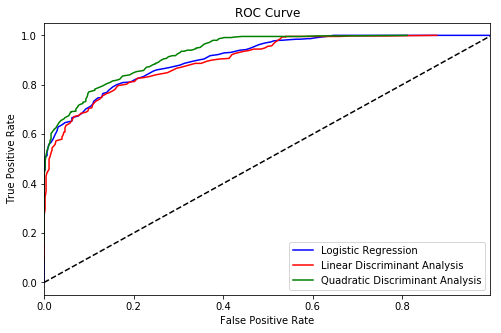

In [135]:
fig2 = plt.figure(figsize=(8,5))
ax1=plt.subplot()
ax1 = ROC_data_lr.plot(x='FP_rate', y='TP_rate', color='blue', ax=ax1, title='ROC Curve', 
                       label='Logistic Regression')
ROC_data_lda.plot(x='FP_rate', y='TP_rate', color='red', ax=ax1, label='Linear Discriminant Analysis')
ROC_data_qda.plot(x='FP_rate', y='TP_rate', color='green', ax=ax1, label='Quadratic Discriminant Analysis')
no_info = np.linspace(0,1,100) # Plot dashed y=x line
plt.plot(no_info, no_info, color='black', linestyle='dashed', label='No Info')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
plt.show()

# Step 10

#### Area under curve computation

In [136]:
"""
    This function takes in the y vector and computes the high value Riemann sum area
    underneath the curve described by the function y(x) where x is the vector of
    function inputs and y is the function output vector
"""
def area_under_roc_curve(y_vec):
    n = len(y_vec)
    h = 1/n
    total_area = 0.
    y_vec = np.sort(y_vec)
    for y in y_vec:
        area = y*h
        total_area += area
    # End for
    return total_area



In [137]:
log_reg_area = area_under_roc_curve(ROC_data_lr['TP_rate'])
print(log_reg_area)
lda_area = area_under_roc_curve(ROC_data_lda['TP_rate'])
print(lda_area)
qda_area = area_under_roc_curve(ROC_data_qda['TP_rate'])
print(qda_area)

0.7203333333333336
0.7440000000000005
0.790755555555556


# Step 11

#### Calculating maximum values for accuracy, precision, recall, and F-measure

In [138]:
# Logistic Regression Max values
display(md("Logistic Regression"))
ROC_data_lr_acc = ROC_data_lr.sort_values(by='accuracy', ascending=False)
display(ROC_data_lr_acc.head(3))
ROC_data_lr_prec = ROC_data_lr.sort_values(by='precision', ascending=False)
display(ROC_data_lr_prec.head(3))
ROC_data_lr_recall = ROC_data_lr.sort_values(by='TP_rate', ascending=False)
display(ROC_data_lr_recall.head(3))
ROC_data_lr_f_measure = ROC_data_lr.sort_values(by='F-measure', ascending=False)
display(ROC_data_lr_f_measure.head(3))
print('\n')

# Linear Discriminant Analysis Max values
display(md("Linear Discriminant Analysis"))
ROC_data_lda_acc = ROC_data_lda.sort_values(by='accuracy', ascending=False)
display(ROC_data_lda_acc.head(3))
ROC_data_lda_prec = ROC_data_lda.sort_values(by='precision', ascending=False)
display(ROC_data_lda_prec.head(3))
ROC_data_lda_recall = ROC_data_lda.sort_values(by='TP_rate', ascending=False)
display(ROC_data_lda_recall.head(3))
ROC_data_lda_f_measure = ROC_data_lda.sort_values(by='F-measure', ascending=False)
display(ROC_data_lda_f_measure.head(3))
print('\n')

# Quadratic Discriminant Analysis Max values
display(md("Quadratic Discriminant Analysis"))
ROC_data_qda_acc = ROC_data_qda.sort_values(by='accuracy', ascending=False)
display(ROC_data_qda_acc.head(3))
ROC_data_qda_prec = ROC_data_qda.sort_values(by='precision', ascending=False)
display(ROC_data_qda_prec.head(3))
ROC_data_qda_recall = ROC_data_qda.sort_values(by='TP_rate', ascending=False)
display(ROC_data_qda_recall.head(3))
ROC_data_qda_f_measure = ROC_data_qda.sort_values(by='F-measure', ascending=False)
display(ROC_data_qda_f_measure.head(3))

Logistic Regression

,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
50,0.504093,360.0,73.0,377.0,90.0,0.800000,0.162222,0.818889,0.831409,0.815402
51,0.514111,356.0,69.0,381.0,94.0,0.791111,0.153333,0.818889,0.837647,0.813714
54,0.544166,344.0,59.0,391.0,106.0,0.764444,0.131111,0.816667,0.853598,0.806565


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
99,0.994995,1.0,0.0,450.0,449.0,0.002222,0.0,0.501111,1.0,0.004435
90,0.904829,118.0,0.0,450.0,332.0,0.262222,0.0,0.631111,1.0,0.415493
81,0.814663,201.0,0.0,450.0,249.0,0.446667,0.0,0.723333,1.0,0.617512


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.003172,450.0,449.0,1.0,0.0,1.0,0.997778,0.501111,0.500556,0.667161
9,0.093338,450.0,343.0,107.0,0.0,1.0,0.762222,0.618889,0.567465,0.724055
15,0.153448,450.0,291.0,159.0,0.0,1.0,0.646667,0.676667,0.607287,0.755668


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
50,0.504093,360.0,73.0,377.0,90.0,0.800000,0.162222,0.818889,0.831409,0.815402
49,0.494074,364.0,79.0,371.0,86.0,0.808889,0.175556,0.816667,0.821670,0.815230
44,0.443982,385.0,110.0,340.0,65.0,0.855556,0.244444,0.805556,0.777778,0.814815


Linear Discriminant Analysis

,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
50,0.505039,358.0,74.0,376.0,92.0,0.795556,0.164444,0.815556,0.828704,0.811791
49,0.494959,359.0,76.0,374.0,91.0,0.797778,0.168889,0.814444,0.825287,0.811299
55,0.555443,340.0,59.0,391.0,110.0,0.755556,0.131111,0.812222,0.852130,0.800942


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
99,0.998998,42.0,0.0,450.0,408.0,0.093333,0.0,0.546667,1.0,0.170732
98,0.988917,94.0,0.0,450.0,356.0,0.208889,0.0,0.604444,1.0,0.345588
97,0.978836,122.0,0.0,450.0,328.0,0.271111,0.0,0.635556,1.0,0.426573


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.001000,450.0,395.0,55.0,0.0,1.000000,0.877778,0.561111,0.532544,0.694981
3,0.031243,449.0,309.0,141.0,1.0,0.997778,0.686667,0.655556,0.592348,0.743377
1,0.011081,449.0,345.0,105.0,1.0,0.997778,0.766667,0.615556,0.565491,0.721865


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
45,0.454635,372.0,94.0,356.0,78.0,0.826667,0.208889,0.808889,0.798283,0.812227
50,0.505039,358.0,74.0,376.0,92.0,0.795556,0.164444,0.815556,0.828704,0.811791
49,0.494959,359.0,76.0,374.0,91.0,0.797778,0.168889,0.814444,0.825287,0.811299


Quadratic Discriminant Analysis

,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
56,0.565525,347.0,45.0,405.0,103.0,0.771111,0.100000,0.835556,0.885204,0.824228
54,0.545364,352.0,51.0,399.0,98.0,0.782222,0.113333,0.834444,0.873449,0.825322
57,0.575606,344.0,44.0,406.0,106.0,0.764444,0.097778,0.833333,0.886598,0.821002


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
99,0.999000,73.0,0.0,450.0,377.0,0.162222,0.0,0.581111,1.0,0.279159
98,0.988919,148.0,0.0,450.0,302.0,0.328889,0.0,0.664444,1.0,0.494983
97,0.978838,181.0,0.0,450.0,269.0,0.402222,0.0,0.701111,1.0,0.573693


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
0,0.001000,450.0,365.0,85.0,0.0,1.000000,0.811111,0.594444,0.552147,0.711462
2,0.021162,449.0,276.0,174.0,1.0,0.997778,0.613333,0.692222,0.619310,0.764255
1,0.011081,449.0,300.0,150.0,1.0,0.997778,0.666667,0.665556,0.599466,0.748957


,prob_threshold,TP_count,FP_count,TN_count,FN_count,TP_rate,FP_rate,accuracy,precision,F-measure
28,0.283263,421.0,138.0,312.0,29.0,0.935556,0.306667,0.814444,0.753131,0.834490
33,0.333667,411.0,125.0,325.0,39.0,0.913333,0.277778,0.817778,0.766791,0.833671
35,0.353828,407.0,120.0,330.0,43.0,0.904444,0.266667,0.818889,0.772296,0.833163


#### Selecting the best values
Based on the sorting, we select the first row from each of the displayed dataframes above. Note that index values shown are the original dataframe index values and these carry through to the newly created dataframes. 

In [139]:
# Select Max values for Logistic Regression
max_accuracy_lr = ROC_data_lr_acc.loc[50].at['prob_threshold']
max_precision_lr = ROC_data_lr_prec.loc[99].at['prob_threshold']
max_recall_lr = ROC_data_lr_recall.loc[0].at['prob_threshold']
max_f_measure_lr = ROC_data_lr_f_measure.loc[50].at['prob_threshold']
display(md("Logistic Regression"))
print("Probability Threshold for Maximum Accuracy: %5f" %max_accuracy_lr)
print("Probability Threshold for Maximum Precision: %5f" %max_precision_lr)
print("Probability Threshold for Maximum Recall: %5f" %max_recall_lr)
print("Probability Threshold for Maximum F-Measure: %5f" %max_f_measure_lr)

# Select Max values for LDA
max_accuracy_lda = ROC_data_lda_acc.loc[50].at['prob_threshold']
max_precision_lda = ROC_data_lda_prec.loc[99].at['prob_threshold']
max_recall_lda = ROC_data_lda_recall.loc[0].at['prob_threshold']
max_f_measure_lda = ROC_data_lda_f_measure.loc[45].at['prob_threshold']
display(md("Linear Discriminant Analysis"))
print("Probability Threshold for Maximum Accuracy: %5f" %max_accuracy_lda)
print("Probability Threshold for Maximum Precision: %5f" %max_precision_lda)
print("Probability Threshold for Maximum Recall: %5f" %max_recall_lda)
print("Probability Threshold for Maximum F-Measure: %5f" %max_f_measure_lda)

# Select Max values for QDA
max_accuracy_qda = ROC_data_qda_acc.loc[56].at['prob_threshold']
max_precision_qda = ROC_data_qda_prec.loc[99].at['prob_threshold']
max_recall_qda = ROC_data_qda_recall.loc[0].at['prob_threshold']
max_f_measure_qda = ROC_data_qda_f_measure.loc[28].at['prob_threshold']
display(md("Quadratic Discriminant Analysis"))
print("Probability Threshold for Maximum Accuracy: %5f" %max_accuracy_qda)
print("Probability Threshold for Maximum Precision: %5f" %max_precision_qda)
print("Probability Threshold for Maximum Recall: %5f" %max_recall_qda)
print("Probability Threshold for Maximum F-Measure: %5f" %max_f_measure_qda)


Logistic Regression

Probability Threshold for Maximum Accuracy: 0.504093
Probability Threshold for Maximum Precision: 0.994995
Probability Threshold for Maximum Recall: 0.003172
Probability Threshold for Maximum F-Measure: 0.504093


Linear Discriminant Analysis

Probability Threshold for Maximum Accuracy: 0.505039
Probability Threshold for Maximum Precision: 0.998998
Probability Threshold for Maximum Recall: 0.001000
Probability Threshold for Maximum F-Measure: 0.454635


Quadratic Discriminant Analysis

Probability Threshold for Maximum Accuracy: 0.565525
Probability Threshold for Maximum Precision: 0.999000
Probability Threshold for Maximum Recall: 0.001000
Probability Threshold for Maximum F-Measure: 0.283263


#### Logistic Regression

Create confusion matrices for each of the probability thresholds

In [143]:
# Create confusion matrix for max accuracy threshold
acc_index = 50
true_pos_lr = ROC_data_lr.loc[acc_index].at['TP_count']
false_pos_lr = ROC_data_lr.loc[acc_index].at['FP_count']
true_neg_lr = ROC_data_lr.loc[acc_index].at['TN_count']
false_neg_lr = ROC_data_lr.loc[acc_index].at['FN_count']

confusion_lr_acc = np.array([[true_pos_lr, false_pos_lr], [false_neg_lr, true_neg_lr]], dtype=int)

# Create confusion matrix for max precision threshold
prec_index = 99
true_pos_lr = ROC_data_lr.loc[prec_index].at['TP_count']
false_pos_lr = ROC_data_lr.loc[prec_index].at['FP_count']
true_neg_lr = ROC_data_lr.loc[prec_index].at['TN_count']
false_neg_lr = ROC_data_lr.loc[prec_index].at['FN_count']

confusion_lr_prec = np.array([[true_pos_lr, false_pos_lr], [false_neg_lr, true_neg_lr]], dtype=int)

# Create confusion matrix for max Recall threshold
recall_index = 0
true_pos_lr = ROC_data_lr.loc[recall_index].at['TP_count']
false_pos_lr = ROC_data_lr.loc[recall_index].at['FP_count']
true_neg_lr = ROC_data_lr.loc[recall_index].at['TN_count']
false_neg_lr = ROC_data_lr.loc[recall_index].at['FN_count']

confusion_lr_recall = np.array([[true_pos_lr, false_pos_lr], [false_neg_lr, true_neg_lr]], dtype=int)

# Create confusion matrix for max F-Measure threshold
f_measure_index
true_pos_lr = ROC_data_lr.loc[f_measure_index].at['TP_count']
false_pos_lr = ROC_data_lr.loc[f_measure_index].at['FP_count']
true_neg_lr = ROC_data_lr.loc[f_measure_index].at['TN_count']
false_neg_lr = ROC_data_lr.loc[f_measure_index].at['FN_count']

confusion_lr_f_measure = np.array([[true_pos_lr, false_pos_lr], [false_neg_lr, true_neg_lr]], dtype=int)



#### Linear Discriminant Analysis

In [144]:
acc_index = 50
prec_index = 99
recall_index = 0
f_measure_index = 45

# Create confusion matrix for max accuracy threshold
true_pos_lda = ROC_data_lda.loc[acc_index].at['TP_count']
false_pos_lda = ROC_data_lda.loc[acc_index].at['FP_count']
true_neg_lda = ROC_data_lda.loc[acc_index].at['TN_count']
false_neg_lda = ROC_data_lda.loc[acc_index].at['FN_count']

confusion_lda_acc = np.array([[true_pos_lda, false_pos_lda], [false_neg_lda, true_neg_lda]], dtype=int)

# Create confusion matrix for max precision threshold
true_pos_lda = ROC_data_lda.loc[prec_index].at['TP_count']
false_pos_lda = ROC_data_lda.loc[prec_index].at['FP_count']
true_neg_lda = ROC_data_lda.loc[prec_index].at['TN_count']
false_neg_lda = ROC_data_lda.loc[prec_index].at['FN_count']

confusion_lda_prec = np.array([[true_pos_lda, false_pos_lda], [false_neg_lda, true_neg_lda]], dtype=int)

# Create confusion matrix for max Recall threshold
true_pos_lda = ROC_data_lda.loc[recall_index].at['TP_count']
false_pos_lda = ROC_data_lda.loc[recall_index].at['FP_count']
true_neg_lda = ROC_data_lda.loc[recall_index].at['TN_count']
false_neg_lda = ROC_data_lda.loc[recall_index].at['FN_count']

confusion_lda_recall = np.array([[true_pos_lda, false_pos_lda], [false_neg_lda, true_neg_lda]], dtype=int)

# Create confusion matrix for max Recall threshold
true_pos_lda = ROC_data_lda.loc[f_measure_index].at['TP_count']
false_pos_lda = ROC_data_lda.loc[f_measure_index].at['FP_count']
true_neg_lda = ROC_data_lda.loc[f_measure_index].at['TN_count']
false_neg_lda = ROC_data_lda.loc[f_measure_index].at['FN_count']

confusion_lda_f_measure = np.array([[true_pos_lda, false_pos_lda], [false_neg_lda, true_neg_lda]], dtype=int)


#### Quadratic Discriminant Analysis

In [145]:
acc_index = 56
prec_index = 99
recall_index = 0
f_measure_index = 28

# Create confusion matrix for max accuracy threshold
true_pos_qda = ROC_data_qda.loc[acc_index].at['TP_count']
false_pos_qda = ROC_data_qda.loc[acc_index].at['FP_count']
true_neg_qda = ROC_data_qda.loc[acc_index].at['TN_count']
false_neg_qda = ROC_data_qda.loc[acc_index].at['FN_count']

confusion_qda_acc = np.array([[true_pos_qda, false_pos_qda], [false_neg_qda, true_neg_qda]], dtype=int)

# Create confusion matrix for max precision threshold
true_pos_qda = ROC_data_qda.loc[prec_index].at['TP_count']
false_pos_qda = ROC_data_qda.loc[prec_index].at['FP_count']
true_neg_qda = ROC_data_qda.loc[prec_index].at['TN_count']
false_neg_qda = ROC_data_qda.loc[prec_index].at['FN_count']

confusion_qda_prec = np.array([[true_pos_qda, false_pos_qda], [false_neg_qda, true_neg_qda]], dtype=int)

# Create confusion matrix for max Recall threshold
true_pos_qda = ROC_data_qda.loc[recall_index].at['TP_count']
false_pos_qda = ROC_data_qda.loc[recall_index].at['FP_count']
true_neg_qda = ROC_data_qda.loc[recall_index].at['TN_count']
false_neg_qda = ROC_data_qda.loc[recall_index].at['FN_count']

confusion_qda_recall = np.array([[true_pos_qda, false_pos_qda], [false_neg_qda, true_neg_qda]], dtype=int)

# Create confusion matrix for max F-measure threshold
true_pos_qda = ROC_data_qda.loc[f_measure_index].at['TP_count']
false_pos_qda = ROC_data_qda.loc[f_measure_index].at['FP_count']
true_neg_qda = ROC_data_qda.loc[f_measure_index].at['TN_count']
false_neg_qda = ROC_data_qda.loc[f_measure_index].at['FN_count']

confusion_qda_f_measure = np.array([[true_pos_qda, false_pos_qda], [false_neg_qda, true_neg_qda]], dtype=int)
